In [55]:
import pandas as pd
import numpy as np

from google.colab import drive

# Bibliotecas de pré-processamento
from sklearn.preprocessing import LabelEncoder

# Bibliotecas de plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [56]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [57]:
df = pd.read_csv('/content/drive/MyDrive/Data/merged_df.csv')

In [58]:
df = df.drop(['record_id', 'idade_faixa'], axis=1)

In [59]:
X_afetam_eficacia = df[['idade_diagnostico','primeiro_IMC','ultima_informacao_paciente', 'tempo_seguimento', 'recidiva_distancia', 'recidiva_regional', 'recidiva_local']]

In [60]:
from sklearn.preprocessing import StandardScaler
X_afetam_eficacia[['tempo_seguimento']] = StandardScaler().fit_transform(X_afetam_eficacia[['tempo_seguimento']])

In [61]:
from sklearn.cluster import KMeans

# km = KMeans( n_clusters = 2, init = 'random', max_iter = 300, n_init = 100, random_state = 52 )

In [62]:
# km.fit( X_afetam_eficacia )

In [63]:
lista_dist = []

n_kmax = 15
for i in range(1, n_kmax):
    km = KMeans( n_clusters=i, init='random', max_iter=300, n_init=10, random_state=0 )
    km.fit(X_afetam_eficacia)
    lista_dist.append( km.inertia_ )

print(lista_dist)

[658461.5780666862, 288460.9620068487, 197508.2517462864, 155772.40157930463, 130953.30499994878, 113540.98676371611, 99358.32656755242, 89785.9004576792, 82180.03952121988, 75750.95393072773, 70611.35710615918, 65727.99287637627, 61535.895347951344, 57683.70607099976]


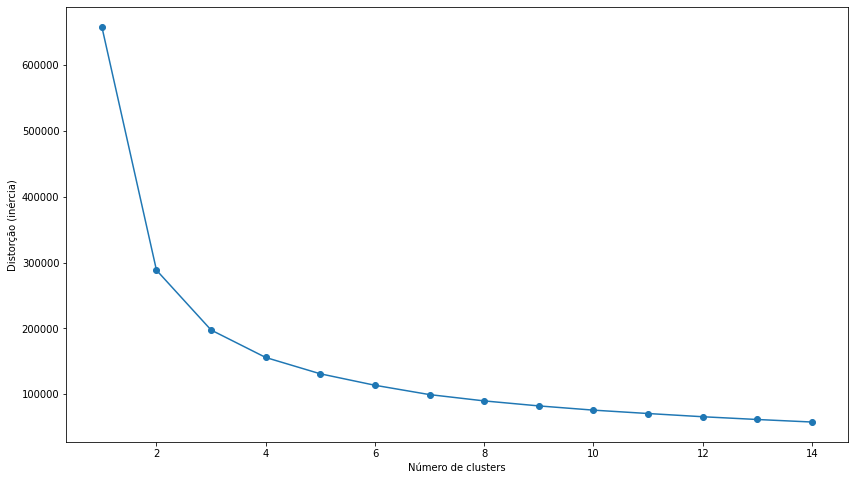

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot( range(1,n_kmax), lista_dist, marker='o'  )
plt.xlabel( 'Número de clusters' )
plt.ylabel( 'Distorção (inércia)' )
plt.show()

In [65]:
y_km = km.predict( X_afetam_eficacia )
df['eficacia_tratamento'] = y_km

In [66]:
df[['idade_diagnostico','ultima_informacao_paciente', 'tempo_seguimento', 'grau_histologico', 'recidiva_distancia', 'recidiva_regional', 'recidiva_local', 'primeiro_peso', 'eficacia_tratamento']]

,idade_diagnostico,ultima_informacao_paciente,tempo_seguimento,grau_histologico,recidiva_distancia,recidiva_regional,recidiva_local,primeiro_peso,eficacia_tratamento
0,51.00,0.00,2225.00,2.00,0.00,0.00,0.00,57.80,2
1,56.00,3.00,4153.00,3.00,0.00,0.00,0.00,84.00,11
2,42.00,3.00,3290.00,2.00,0.00,0.00,0.00,63.20,3
3,52.00,2.00,182.00,3.00,0.00,0.00,0.00,54.00,0
4,40.00,3.00,3234.00,2.00,1.00,0.00,0.00,58.00,3
...,...,...,...,...,...,...,...,...,...
3171,69.00,3.00,875.00,2.00,0.00,0.00,0.00,75.55,9
3172,60.00,3.00,859.00,3.00,0.00,0.00,0.00,73.00,5
3173,47.00,3.00,873.00,1.00,0.00,0.00,0.00,113.85,4
3174,50.00,3.00,869.00,2.00,0.00,0.00,0.00,57.00,2


In [67]:
# fazer alguns graficos de que tinha ((idade avançada com primeiro peso grande e eficacia tratamento))

In [68]:
print(len(df.query("idade_diagnostico > 80 and ultima_informacao_paciente == 3 and eficacia_tratamento == 0")))
print(len(df.query("idade_diagnostico > 80 and ultima_informacao_paciente == 3 and eficacia_tratamento == 1")))
# 0 é tratamento bom 
# 1 é tratamento ruim
# isso mostra dois casos o de uma pessoa mais idosa de 80 anos de idade que saiu viva ou seja o tratamento foi bom 
#o outro mostra que não tem nenhum caso em que a pessoa mais idosa sobreviveu e o tratamento foi classificado como negativo

0
26


In [69]:
df.query("idade_diagnostico < 30 and ultima_informacao_paciente == 0 and eficacia_tratamento == 1")

print(len(df.query("idade_diagnostico < 30 and ultima_informacao_paciente == 0 and eficacia_tratamento == 0")))
print(len(df.query("idade_diagnostico < 30 and ultima_informacao_paciente == 0 and eficacia_tratamento == 1")))
# 0 é tratamento bom 
# 1 é tratamento ruim
# isso mostra dois casos o de uma mulher nova com menos de 30 anos uma que morreu e a outra que não de maneira que ela morreu, então o tratamento
# bem classificado, ou seja ele esta classificando bem

0
0


In [70]:
df = df.query("tratamento == 0 or tratamento == 1")[:]

In [71]:
df

,escolaridade,idade_diagnostico,sexo,raca,ultima_informacao_paciente,tempo_seguimento,ja_gravida,gestacao_idade,tempo_amamentacao,grau_parentesco_mama_primeiro_1_vez,...,primeira_altura,primeiro_IMC,ultimo_peso,ultima_altura,ultimo_IMC,diferenca_peso,coef_peso,diferenca_tempo,coef_peso_tempo,eficacia_tratamento
0,1.00,51.00,0.00,3.00,0.00,2225.00,1.00,21.00,23.00,0.00,...,158.00,23.15,64.90,158.00,26.00,7.10,1.12,1602.00,0.00,2
1,1.00,56.00,0.00,2.00,3.00,4153.00,1.00,29.00,39.00,0.00,...,152.00,36.36,85.90,152.00,37.18,1.90,1.02,1455.00,0.00,11
2,2.00,42.00,0.00,4.00,3.00,3290.00,1.00,23.00,8.00,0.00,...,167.00,22.66,63.65,167.00,22.82,0.45,1.01,1616.00,0.00,3
3,5.00,52.00,0.00,0.00,2.00,182.00,1.00,24.00,2.00,0.00,...,146.00,25.33,60.20,147.00,27.86,6.20,1.11,4626.00,0.00,0
4,5.00,40.00,0.00,1.00,3.00,3234.00,1.00,28.00,57.00,0.00,...,148.00,26.48,55.00,150.00,24.44,-3.00,0.95,1341.00,-0.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,3.00,69.00,0.00,1.00,3.00,875.00,1.00,32.00,32.00,0.00,...,175.00,24.67,62.74,175.00,20.49,-8.15,1.16,752.00,0.00,9
3172,5.00,60.00,0.00,1.00,3.00,859.00,1.00,22.00,20.00,0.00,...,153.00,31.18,82.35,153.00,35.18,9.35,1.13,2685.00,0.00,5
3173,0.00,47.00,0.00,0.00,3.00,873.00,1.00,25.00,18.00,0.00,...,155.00,47.39,43.98,152.65,18.88,5.32,0.92,0.00,0.00,4
3174,3.00,50.00,0.00,1.00,3.00,869.00,1.00,22.00,3.00,0.00,...,158.00,22.83,57.00,158.00,22.83,0.00,1.00,0.00,0.00,2


In [72]:
import numpy as np

df = df.astype('float64')
df = df[np.isfinite(df).all(1)]

In [73]:
from sklearn.model_selection import train_test_split

X = df.drop('tratamento', axis=1)
y = df['tratamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 73)

In [74]:
import lightgbm as lgb

model = lgb.LGBMClassifier()

model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9986149584487535
0.667384284176534


In [75]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


In [77]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.68,0.67,0.67,0.68,0.34
ExtraTreesClassifier,0.67,0.67,0.67,0.67,0.41
RandomForestClassifier,0.67,0.66,0.66,0.67,0.63
RidgeClassifier,0.66,0.66,0.66,0.66,0.03
LinearSVC,0.66,0.66,0.66,0.66,0.36
RidgeClassifierCV,0.66,0.66,0.66,0.66,0.05
LinearDiscriminantAnalysis,0.66,0.66,0.66,0.66,0.05
LogisticRegression,0.66,0.66,0.66,0.66,0.04
CalibratedClassifierCV,0.66,0.66,0.66,0.66,1.67


In [78]:
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression, PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score
import numpy as np

from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier

classifiers = [AdaBoostClassifier(), 
               RandomForestClassifier(),
               ExtraTreesClassifier(),
               RidgeClassifierCV(), 
               LinearSVC(),
               LogisticRegression(), 
               SVC(), 
               LGBMClassifier(),
               LinearDiscriminantAnalysis(), 
               RidgeClassifier(), 
               CalibratedClassifierCV(), 
               XGBClassifier(),
               NearestCentroid(), 
               SGDClassifier(), 
               BaggingClassifier(),
               BernoulliNB(),
               PassiveAggressiveClassifier(), 
               Perceptron(),
               NuSVC(), 
               DecisionTreeClassifier(), 
               KNeighborsClassifier(),
               LabelSpreading(),
               LabelPropagation(), 
               ExtraTreeClassifier(),
               GaussianNB(),
               DummyClassifier(),
               QuadraticDiscriminantAnalysis()]

precisions = []

for classifier in classifiers:
    clf = classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precisions.append(precision_score(y_test, y_pred))

print(precisions)

[0.6625916870415648, 0.6475, 0.6520618556701031, 0.6557788944723618, 0.465016146393972, 0.5899705014749262, 0.0, 0.648910411622276, 0.6506329113924051, 0.6491228070175439, 0.5207667731629393, 0.6162280701754386, 0.4636363636363636, 0.4659977703455964, 0.6132315521628499, 0.5461956521739131, 0.0, 0.47005649717514125, 0.38557993730407525, 0.5851528384279476, 0.4627906976744186, 0.0, 0.0, 0.5158371040723982, 0.5701275045537341, 0.0, 0.4645308924485126]


In [81]:
models['Precisions'] = 0

for i in range(0, len(precisions)):
  models['Precisions'].iloc[i] = precisions[i]

models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,Precisions
Model,,,,,,
AdaBoostClassifier,0.68,0.67,0.67,0.68,0.34,0.66
ExtraTreesClassifier,0.67,0.67,0.67,0.67,0.41,0.65
RandomForestClassifier,0.67,0.66,0.66,0.67,0.63,0.65
RidgeClassifier,0.66,0.66,0.66,0.66,0.03,0.66
LinearSVC,0.66,0.66,0.66,0.66,0.36,0.47
RidgeClassifierCV,0.66,0.66,0.66,0.66,0.05,0.59
LinearDiscriminantAnalysis,0.66,0.66,0.66,0.66,0.05,0.00
LogisticRegression,0.66,0.66,0.66,0.66,0.04,0.65
CalibratedClassifierCV,0.66,0.66,0.66,0.66,1.67,0.65


In [82]:
#Precisão

#Revocação

#Curva ROC

#fazer matriz de confusão do nosso modelo final melhor 😁